In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
path = './StudentsPerformance.csv'
sp_df = pd.read_csv(path)
sp_df.info()
sp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
sp_df_copy = sp_df.copy()

In [4]:
sp_df.isna().sum()
# no null data

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
sp_df.duplicated().sum()
# no duplicates 

0

In [6]:
# checking for consistency of data
def check_inconsistent_values(df):
    for col in df:
        series = df[col]
        print(f" Series -->{col} unique values are {series.unique()} \n")

In [7]:
check_inconsistent_values(sp_df)

 Series -->gender unique values are ['female' 'male'] 

 Series -->race/ethnicity unique values are ['group B' 'group C' 'group A' 'group D' 'group E'] 

 Series -->parental level of education unique values are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

 Series -->lunch unique values are ['standard' 'free/reduced'] 

 Series -->test preparation course unique values are ['none' 'completed'] 

 Series -->math score unique values are [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

 Series -->reading score unique values are [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44

In [8]:
sp_df['average score'] = sp_df[['math score','reading score','writing score']].mean(axis=1).round()
sp_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [9]:
# need to convert float to int to get rid of .0
sp_df['average score'] = sp_df['average score'].astype(int)
sp_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,92
7,male,group B,some college,free/reduced,none,40,43,39,41
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


In [10]:
def create_boxplot(df):
    for column in df:
        series = df[column]
        if series.dtype == 'int':
        # print(column)
            sns.boxplot(df, x=series, color='#3F6C51', showmeans=True)
            #add overall title
            plt.title(f"Name  : {column}", fontsize=16)
            #add axis titles
            plt.xlabel(f'{column}')
            plt.show()
        # if series.dtype

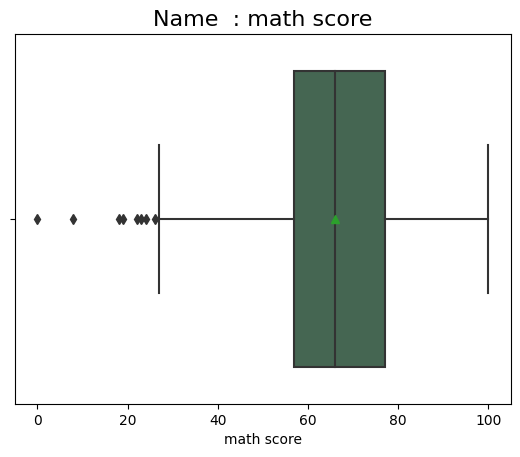

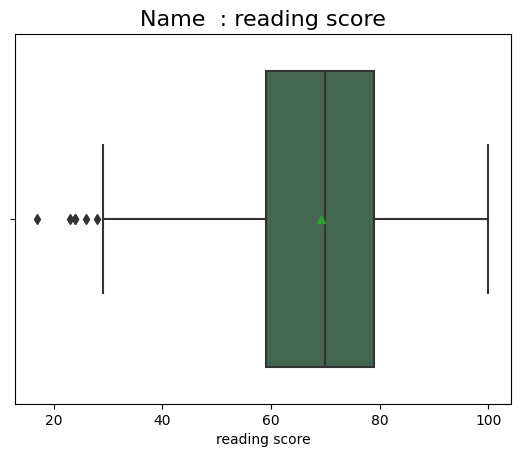

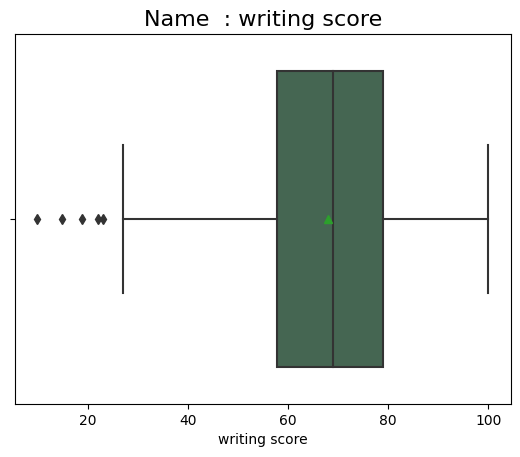

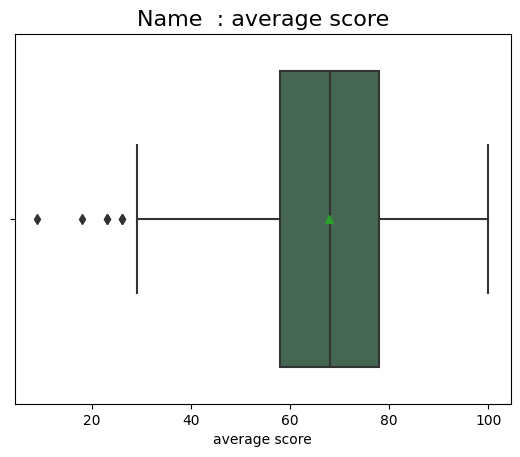

In [11]:
create_boxplot(sp_df)

In [12]:
sp_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
average score                   int64
dtype: object

In [13]:
target ='average score'
y = sp_df[target]
X = sp_df.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Selecting all categorical features

In [14]:
cat_select = make_column_selector(dtype_include='object') #initialization 
num_select = make_column_selector(dtype_include='int')

In [15]:
# cat_select #this just give you location in memory
cat_select(X_train) #this gives a list of columns names that are objects

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [16]:
num_select(X_train)  #this gives a list of columns names that are int

['math score', 'reading score', 'writing score']

In [17]:
# assigning train cat data to a variables that represents my column names with objects
train_cat_data = X_train[cat_select(X_train)]
test_cat_data = X_test[cat_select(X_train)]
train_cat_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
82,male,group A,some college,free/reduced,completed
991,female,group B,some high school,standard,completed
789,female,group C,master's degree,free/reduced,none
894,female,group E,associate's degree,standard,none
398,male,group B,some high school,standard,none
323,female,group C,some high school,free/reduced,none
519,female,group B,high school,free/reduced,completed
916,male,group E,bachelor's degree,standard,completed
922,male,group D,high school,standard,none
5,female,group B,associate's degree,standard,none


# using one hot encoder

In [18]:
ohe_encode  = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_encode.fit(train_cat_data) #fits **only** training data, which is a dataframe of objects only, 
                                # but does not return an array or transforms yet
train_ohe = ohe_encode.transform(train_cat_data) #doing the actual transforming of categorical 
                                                # features on training data into numeric
test_ohe = ohe_encode.transform(test_cat_data) # doing the actual transforming of categorical
                                                # features on test data into numeric

train_ohe  # returns numpy array

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [19]:
# putting this numpy array back into a dataframe
# train_cat_data.columns (grabbing object columns names)
ohe_column_names = ohe_encode.get_feature_names_out(train_cat_data.columns)
# redefining train and test ohe to a dataframe
train_ohe= pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)

train_ohe.head(10)

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
train_num_df = X_train[num_select(X_train)].reset_index(drop=True) # puts indexes in order
test_num_df = X_test[num_select(X_train)].reset_index(drop=True)

In [21]:
# X_train[num_select(X_train)] #dataframe index out of order
# train_nums
# test_num
X_train_df = pd.concat([train_num_df, train_ohe], axis=1)
X_test_df = pd.concat([test_num_df, test_ohe], axis=1)

In [22]:
X_train_df.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,50,47,54,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,65,82,78,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,52,65,61,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,59,62,69,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,74,63,57,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,43,53,53,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,67,78,79,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,100,100,100,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,72,66,66,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,71,83,78,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
X_test_df.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,91,86,84,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,53,66,73,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,80,73,72,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,74,77,73,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,84,83,78,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,81,75,78,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,69,70,63,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,54,61,62,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,87,73,72,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,51,54,41,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [28]:
train_cat_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
82,male,group A,some college,free/reduced,completed
991,female,group B,some high school,standard,completed
789,female,group C,master's degree,free/reduced,none
894,female,group E,associate's degree,standard,none
398,male,group B,some high school,standard,none
323,female,group C,some high school,free/reduced,none
519,female,group B,high school,free/reduced,completed
916,male,group E,bachelor's degree,standard,completed
922,male,group D,high school,standard,none
5,female,group B,associate's degree,standard,none


In [27]:
dummy_encoded = pd.get_dummies(data=train_cat_data, drop_first=False)
dummy_encoded.head(20)

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
82,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
991,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
789,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
894,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
398,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
323,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
519,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
916,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
922,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
5,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
